# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sb
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [9]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [10]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [97,24,117]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,403,254,610,774,54,63
1,22647,9776,13792,2915,4482,5778
2,6990,3880,5380,1647,319,1160


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
The 3 kinds of cutomers chosen have different consumption patterns.
The first sample indexed as 0 has a very low consumption of each item. Every product is brought in low quantities, especially Delicatessen.  All products are consumed almost equally, with no skew in consumptions towards a single product. It may be possible that the customer is either belonging to a small household. This client has spending that are significantly lower than even the lower 25th percentile of buyers

The customer indexed second has a very high consumption of fresh iterms, milk, grocery detergents_paper and delicatessen. This client is close to the 75th percentile spender. This is an unsually high stock where fresh items are consumed margainally less than twice the mean, milk is consumed 1.7 times the mean, groceries 4.5 times more than the mean, detergents paper around 1.5 times the mean and delicatessen 3.75 times the mean. The heavy consumption of grocery and delicattensen as compared to all other items, may show that this user is a gourmet restraunt. This would explain the dearth of consumption of frozen foods and moderate use of detergents paper. Milk in this set up will generally be used for a few deserts, thus the comparitively lower consumption.

The third user consumes all products at quantities slightly close to the mean. The stock of fresh items and detergent paper consumed are low. This consumer is a general supermarket, with a local clientele. People in this neighbourhood has regular food trends and no prodict is consumed at very high amounts. Although the lack of consumption of fresh items can be thought of as the general store specialising in grocery, milk and delicatessen products with moderate stocks of all other products.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for sym in ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']:
    new_data = pd.DataFrame(data)
    test_variable=new_data[sym]
    new_data.drop([sym], axis = 1, inplace = True)
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    from sklearn.model_selection import train_test_split
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, test_variable, test_size=0.25, random_state=91)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)
    # TODO: Report the score of the prediction using the testing set
    from sklearn.metrics import r2_score
    score = r2_score(y_test,regressor.predict(X_test))
    print 'R2 score for the attribure {} is {}'.format(sym, score)

R2 score for the attribure Fresh is -0.667044992598
R2 score for the attribure Milk is -0.00798238405531
R2 score for the attribure Grocery is 0.693308182365
R2 score for the attribure Frozen is -0.207599230515
R2 score for the attribure Detergents_Paper is 0.528667998461
R2 score for the attribure Delicatessen is 0.0012398351293


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I tried predicting all features, by excluding each feature from the result, while using all the other set of features to predict it. 

The only feature which had a high R2 score, and can be predicted from the set of other features eas Grocery. Grocery has an R2 score of 0.692, when a Decision Tree Regressor was applied to it. This means than the Groceries can be predicted by all other attributes, and its individual independence in the dataset is not high. 

As the groceries do not have high independence in the data, we can exclude it from the dataset, while clustering as it does does not add, any new information to the dataset, which is already not known to us.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
sb.heatmap(data.corr())

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
The data is not normally distributed. The data for each attribute does peak like the bell curve, but has an elongated tail at the right side, and a very short tail on the left. This represents skew in the data, and the presence of outliers. Upon the the elimination of outliers, the skew will be reduced. Observing all scatter matrices, the density of points around the lower left quarter of the grid is very high. The density in the other parts of the quadrant is very low. This shows that most consumers have low and medium consumption and only a few outliers have very high consumption. 

Milk, groceries and detergents paper have a correlation between them. We can see that Groceries and detergents paper has high correlation between them and a linear relation can be calculated between milk, detergents paper for groceries.

Suspicions about groceries being a dependent variable are confirmed. Milk and detergents, also can be vaguely predcited using the other 2 parameters, but by as confirmed by the R2 scores, groceries are best predicted by detergent paper and milk.

The data for these features are lineraly distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Users/akhilsethia/miniconda3/envs/ml2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


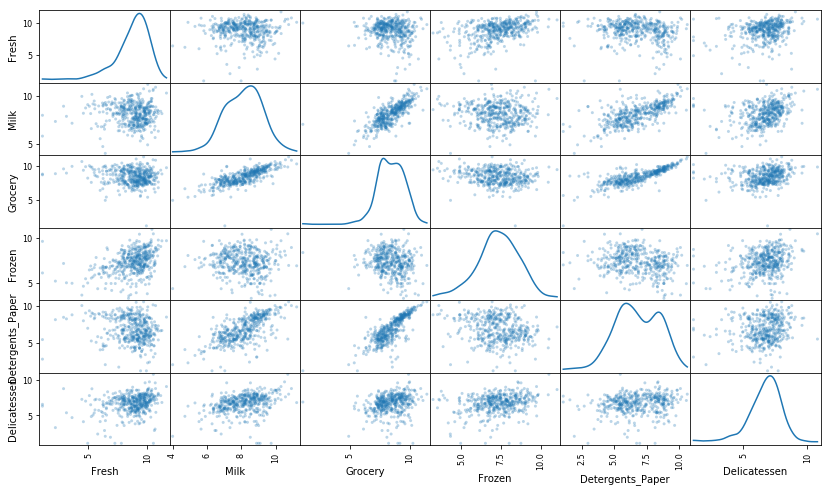

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [112]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
1,10.027783,9.187686,9.531844,7.977625,8.407825,8.661813
2,8.852236,8.263590,8.590444,7.406711,5.765191,7.056175


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data,25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step =  (1.5)*(Q3-Q1)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_records=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_indices=outlier_records.index.values
    outlier_indices=pd.DataFrame(outlier_indices)
    # OPTIONAL: Select the indices for data points you wish to remove
    #All indices appearing in more than 2 outlier lists
    outliers  = [66,75,142,154]
    # Remove the outliers, if any were specified
    good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
Points selected as outliers in the code block above are the ones which have more than 2 outliers. Indices with more than 2 outlier are 66, 75, 142 and 154.

These points should be removed from the dataset, as they would skew the results. Also, only 1 of all the above outliers has an outlier in the attribute Grocery. All other attributes are independent of each other, so they would result in our clustering to be inappropriate.

Data points chosen in the outlier list are the ones which have more than 2 outlier values. This would cause these to be double counted in 2 attributes, and would result skew the cluster centers of the respective attributes. This would not produce accurate results. Hence, we would remove them.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

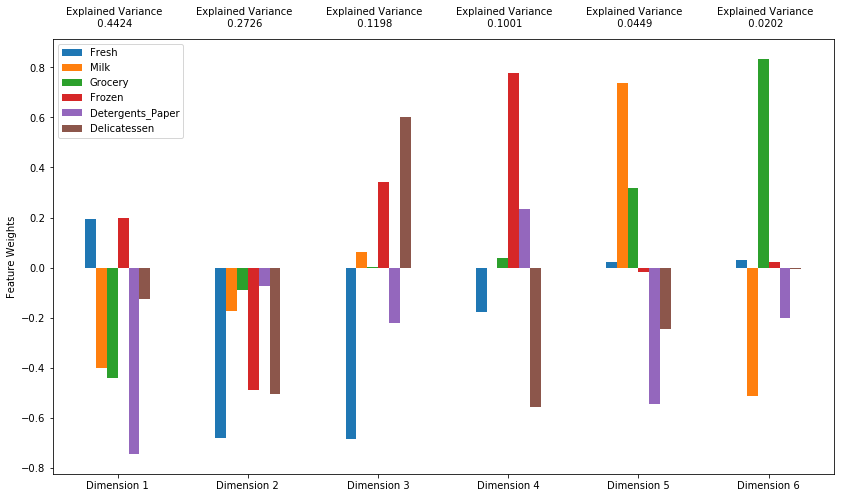

In [15]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit_transform(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_sample = pca.transform(log_samples)
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
The first and second principal components explain 71.5% of the variance in the data. This means that 71.5% of the spread of the data for these components is captures cumulatively by the first 2 components. 

When the first 4 components are taken into consideration, 93.5% of the spread of the data amongst all components is successfully represented. Almost the entire data is is represented by these 4 principal components. A very small amount of variance is left unexplained when data is transformed from six dimensions to four dimensions.

DIMENSION 1:
As we see dimension 1, it has a very high negative feature weight for detergent paper and fairly high negative feature weights for milk and groceries. This dimension caputers the relationship between these 3 features, and they are well represented by this dimension. This dimension has an extremely high variance, i.e. the spread of data is highest along this dimension.  

DIMENSION 2:
This dimension has a very high contribution from frozen, delicatessen and fresh items. All items which are not well represented in the first dimension have good representation here. This makes the PCA more thorough, as all features are represented accuractely. All these have high negative feature weights with negligible contribution from other features.

DIMENSION 3:
This dimension again captures the same features as the second dimension. Interestingly, we see that the cumulative variance of the second and third dimesnions are almost equal to that of the variance in the first dimension. This shows the PCA equally representation correlated combinations of data, and thus maintaining the underlying trend. Although, interestingly, we see that the despite pattern being same, there is negative correlation between Delicatessen and other attributes, and Milk and other features. This is not observed in the second dimension. This shows that the magnitude of correlation is high, but if, one feature takes a low value, the inversely correlated feature takes high values.

DIMENSION 4:
This dimension has significant representation from Delicatessen and Frozen with little representation from detergents paper. Although, the representation between the 2 attributes have inverse feature weights, unlike that in Dimension 2 and DImension 3. This shows that the magnitude of each factor has oposing values i.e. if one attribute has a high value, the other has a low value. The explained variance of this dimension is relatively low as compared to the earlier 3 dimensions. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
display(pd.DataFrame(np.round(pca_sample, 4)),columns = pca_results.index.values)

,0,1,2,3,4,5
0,3.7047,4.3241,0.5777,0.6625,-0.4554,0.1044
1,-1.9424,-2.5907,0.2479,-0.3907,-0.2119,0.0729
2,0.6694,-0.2594,0.4183,-0.3858,0.6191,0.2555


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [121]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca.fit(log_samples)
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [122]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.8679,-0.2857
1,-4.1292,-0.4724
2,-0.7387,0.7581


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

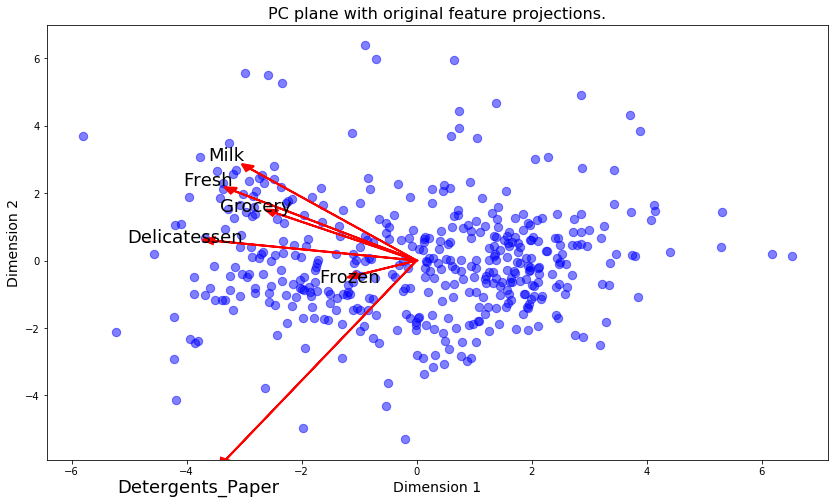

In [123]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
K-Means clustering is a very simple algorithm to implement. It works extremely well with distinctive and spherical clusters. It has time complexity lower than that of single linkage clustering and it suitable for performing clustering on large datasets.

Gaussian Mixture Models are a general form of K-Means, but are not equally fast and easy to implement. These models are very useful when the data is not separated into didtinctive clusters. Membership chance of the point belonging to each cluster is given. For outliers, and stray points, we can get to see the ownership proportion unlike in other clustering algorithms.

In our data, where we can distinctively separate out extremely high spending individuals from the sparsely spending ones. We can differentiate between customers in distinctive segments. Because our clusters or segments seem well defined, and the members of these segments have non-overlapping spending patterns, we should use KMeans should be used. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [124]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
greatest = 0
for i in range(2,11):
    clusterer = KMeans(n_clusters=i,n_init=10)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
   # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    if score >= greatest:
        greatest=i
    print '{} for cluster size {}'.format(score,i)

clusterer = KMeans(n_clusters=greatest,n_init=10)
clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

0.424800390073 for cluster size 2
0.397460210788 for cluster size 3
0.332383769113 for cluster size 4
0.343180966827 for cluster size 5
0.365004000919 for cluster size 6
0.364760616784 for cluster size 7
0.351478486086 for cluster size 8
0.366198039333 for cluster size 9
0.364117700864 for cluster size 10


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
The code above finds out the silhouette value for 9 possible cluster sizes. According to the silhouette values, cluster of size 2 is the most optimum for this problem.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

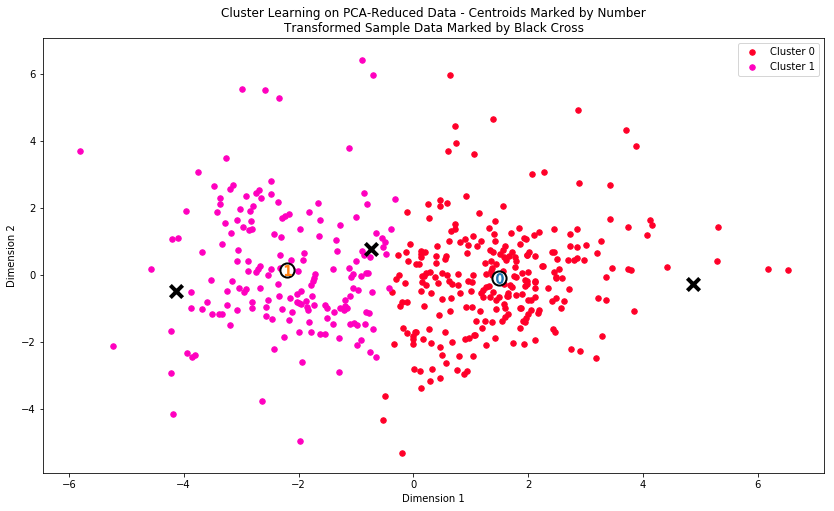

In [125]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [126]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,1973.0,1104.0,2071.0,1254.0,230.0,352.0
Segment 1,11335.0,5607.0,7944.0,2115.0,1058.0,2299.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Segment 0 represents the restaurant or a super market owner. The values of all purchases are close to the mean, but significantly different from the median. This shows that despite the fact that this sample has purchase values similar to the mean, but this segment does not represent the average buyer. It represents a big spender.

Segment one is a daily household user. All purchases of this user is in the lower one fourth of the purchasing segment. It represents the household sample who has very low purchasing power.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [127]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
The sample point 1 is best represented by cluster 1 and it is rightly classified. This sample belongs to the extreme low segment of buyers. Hence the cluster 1, which represents medium to low purchasing value powers. 

The sample point 1 represents the average general store and is almost at the middle of the purchasing range. This point could have been either classified by cluster 1 or cluster 0. This would not have made a considerable change to the identification of the point.

Sample point 2 represents extreme heavy spending and is rightly identified by cluster 0. Cluster 0 represents heavy spending buyers.

The clustering is justified over the 3 data points.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

In [128]:
result = pd.DataFrame(preds,columns=['Cluster'])
low_consumption_indices = result[result['Cluster'] == 0].index
high_consumption_indices = result[result['Cluster'] == 1].index
low_consumption = result[result['Cluster'] == 0].count().values
high_consumption = result[result['Cluster'] == 1].count().values
print 'Number of users belonging to a low consumption cluster are {} and number of users belonging to a high consumption cluster are {}'.format(high_consumption, low_consumption)
revenue_cluster0 = pd.DataFrame(data,index=low_consumption_indices.values)
revenue_cluster1 = pd.DataFrame(data,index=high_consumption_indices.values)
print 'The sum of revenues from low consumption cluster(Cluster 0) is {} and the sum of revenues from the high consumption cluster(Cluster 1) is {}'.format(revenue_cluster0.sum(),revenue_cluster1.sum())

Number of users belonging to a low consumption cluster are [176] and number of users belonging to a high consumption cluster are [260]
The sum of revenues from low consumption cluster(Cluster 0) is Fresh               3319146
Milk                1297869
Grocery             1756190
Frozen               859191
Detergents_Paper     584165
Delicatessen         372662
dtype: int64 and the sum of revenues from the high consumption cluster(Cluster 1) is Fresh               1894149
Milk                1231890
Grocery             1706623
Frozen               486409
Detergents_Paper     668113
Delicatessen         291891
dtype: int64


**Answer:**
A/B Testing in this case would be having 2 control groups in which 1 control group will have a 5-day delivery schedule system and the other will have a 3-day delivery schedule. By varying the delivery schedule, we can see which one is more effective for the business. Delivery schedule of 5-days will be more suitable for Cluster 2 stakeholders and the 3-day delivery schedule will be better for Cluster 1 stakeholders. The cost of changing delivery is analysed below, and we can analyse, which will be better for the business.

When the delivery service will change from 5 times to 3 times a week, the cutomers who buy in bulk and have larger orders will be affected, as they have a higher daily demand than those who consume less. To decide whether the sompany whould cut their delivery, we should compare, the number of customers and the revenue from them. Dependent on the impact of revenue as compared to the cost cutting of delivering less, the company can make thier decision.

The total sum of all items for consumers in cluster 1, which have lower yearly purchase and thus generate low weekly demand is 6.28 million. These consumers will not be affected if the company switches to supplying every 3 days a week. As thier consumption is low, they can stock products for 2 days if supply frequency is reduced. This will not cause a huge impact. Despite low cumulative purchase, the volume of these customers is high at 260. 

The total sum of all items for consumers in cluster 2 is 8.19 million. These are customers with very high annual puchases, and hence generate more daily demand. With the delivery frequency being reduced, these customers will not be able to fulfil their demands with lower stock and many clients may choose to switch to alternate suppliers.

The change in delivery frequency will depend on how much cost saving, this will bring. Although as we see that the bulk buying sutomers form majority of the revenue base for this firm, reducing delivery frequency would have large implications on revenue and loss of clients.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
A set of points within a cluster have very similar values to each other. These clusters contain a group of consumers which have very similar purchasing pattern. This can be thought of as clients within a cluster having the same label. Eg: Clients within one cluster are similar to one another so they can all be branded as restaurants or households. Once we attach a label like this to our points in a cluster, this problem becomes a supervised learning problem.

In our case, points belonging to each cluster can be assigned a label based on their spending. Given the cluster centres, the wholesaler can determine the label or the segment of consumers in a particular cluster. Once the initial segment has been decided, all points within this cluster are assigned a label. 

Once we have labelled dataset, we can run this as a supervised learning problem. We can enter the customer spending and recieve an output, which is its customer segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

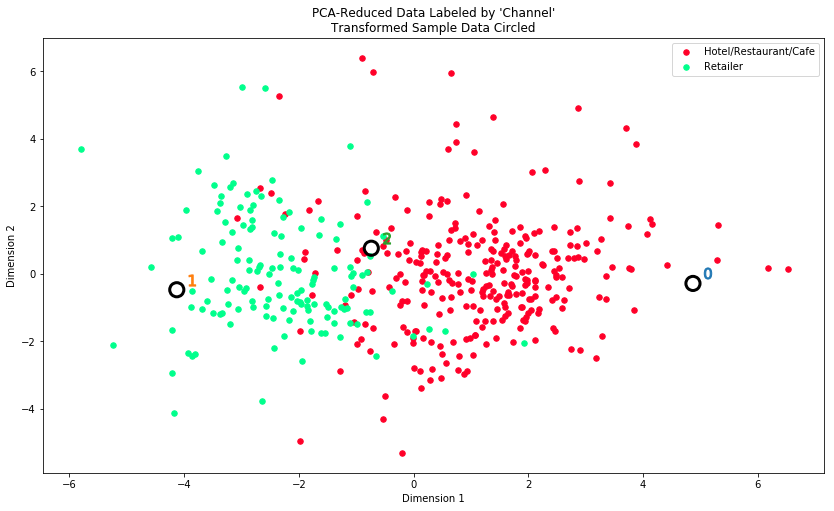

In [129]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In [174]:
from sklearn.metrics import accuracy_score
clustered_data=pd.DataFrame(data)
clustered_data = clustered_data.drop(clustered_data.index[outliers]).reset_index(drop = True)
clustered_data['Results']=preds+1
unfiltered_data=pd.read_csv("customers.csv")
unfiltered_data.drop(['Region'],axis=1,inplace=True)
unfiltered_data = unfiltered_data.drop(unfiltered_data.index[outliers]).reset_index(drop = True)

#Creating a dataframe containing the channel of points in cluster 0
cluster0=pd.DataFrame(unfiltered_data,index=clustered_data[clustered_data['Results'] == 1].index.values)
cluster0.drop(['Milk', 'Fresh','Grocery','Frozen','Delicatessen','Detergents_Paper'],axis=1,inplace=True)
cluster0['Predicted_Reult']=clustered_data[clustered_data['Results'] == 1]['Results']

#Creating a dataframe containing the channel of points in cluster 1
cluster1=pd.DataFrame(unfiltered_data,index=clustered_data[clustered_data['Results'] == 2].index.values)
cluster1.drop(['Milk', 'Fresh','Grocery','Frozen','Delicatessen','Detergents_Paper'],axis=1,inplace=True)
cluster1['Predicted_Reult']=clustered_data[clustered_data['Results'] == 2]['Results']

#Calculating the purity of each cluster
purity_cluster0=accuracy_score(cluster0['Channel'],cluster0['Predicted_Reult'])
purity_cluster1=accuracy_score(cluster1['Channel'],cluster1['Predicted_Reult'])
#Accuracy of clustering wrt their original Channel
combined_accuracy=accuracy_score(unfiltered_data['Channel'],clustered_data['Results'])

#Printing individual results
print 'The purity of cluster 0 is {} and the purity of cluster 1 is {}'.format(purity_cluster0,purity_cluster1)
print 'The combined accuracy of clustering of data with respect to their orginal segments for the complete dataset is {}'.format(combined_accuracy)


The purity of cluster 0 is 0.973076923077 and the purity of cluster 1 is 0.767045454545
The combined accuracy of clustering of data with respect to their orginal segments for the complete dataset is 0.889908256881


### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
The clustering does fairly well as compared to the underlying distribution. The clustering provides us with an accuracy of 88.9% if compared with the othe distribution. The number of clusters chosen are coherent with the that in the original distribution. The purity of cluster 0 that is of identifying 'Hotels/Restaurants/Cafes' is very hugh at 97.3% and clustering does well in identifying consumers with large consumption. The purity of cluster 2 is 76.7% which is low. This can be reasoned by the fact that 'Hotels/Restaurants/Cafes' can be of any scale. A small scaled 'Hotels/Restaurants/Cafes' will have very low consumption, similar to that of a retailer, whereas a large scale 'Hotels/Restaurants/Cafes' will have high consumption, Although, the class label have been identified wrongly, the habits of a few retailers are identical to that of small, mid-scaled 'Hotels/Restaurants/Cafes'. Hence, despite poor performance on this cluster, the cluster fairs well. For better results, we can can merge 'Retailers' and small,mid-scaled 'Hotels/Restaurants/Cafes' into 1 class label and large-scaled 'Hotels/Restaurants/Cafes' as another class label.

The customer segment 'Hotels/Restaurants/Cafes' can be classified almost purely, although there are very few 'Retailer' points in this segment as well. The classification is not pure classification but very close to pure.

With my previous definition of customer segments, I didvided the dataset similarly into 2 types, 'Hotels and Large Retailers' and 'Small Eateries, Local Supermarkets and Households'. The theme of one group having greater consumption than the other is consistent with the underlying labels, althought the class labels are not perfectly the same.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.